**Разработка стратегии взаимодействия с клиентами сети фитнес-центров на основе аналитических данных.**

Фитнес-центру необходимо уменьшить отток клиентов и выработать стратегию взаимодействия с посетителями.  Наша задача — провести анализ и подготовить план действий по удержанию клиентов, для этого необходимо выполнить следующие этапы:   

* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

В нашем распоряжении таблица, содержащая следующие колонки:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промокод от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

In [1]:
#Импортируем необходимые библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap as tw
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import itertools

In [2]:
#Загрузим данные
try:
     df=pd.read_csv('/datasets/gym_churn.csv')
except:
     df = pd.read_csv('C:\datasets\gym_churn.csv')

In [3]:
#Посмотрим информацию о данных
print(df.shape)
display(df.head(5))
df.info()

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Таблица состоит из 14 столбцов и 4000 строк, пропущенных значений в таблице нет, с типами данных в столбцах проблем тоже нет.

## Исследовательский анализ данных.

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#Приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
#Проверим таблицу на наличие дубликатов
print('Количество дубликатов в таблице:', sum(df.duplicated()))

Количество дубликатов в таблице: 0


### Оценка средних значений и стандартных отклонении признаков. 

In [7]:
#Посмотрим основные значения колонок с помощью метода describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Выводы:
  * Распределение по полу показывает, что количество мужчин и женщин практически одинаковое;
  * Более 80% человек проживают или работают поблизости от фитнес центра;
  * Почти половина всех посетителей являются сотрудниками компаний-партнёров клуба;
  * 30% людей стали клиентами в рамках акции "приведи друга";
  * Больше 90% посетителей указали свой номер телефона в анкетных данных;
  * Средняя длительность действующего абонемента у клиентов составляет 4.6 месяцев;
  * 40% от всех клиентов посещают групповые занятия;
  * Средний возраст посетителей фитнес клуба 29 лет;
  * Средняя выручка от других услуг фитнес-центра составляет 147 у.е.;
  * Средний срок до окончания абонемента у пользователей 4 месяца;
  * Среднее время с момента первого посещений около 4 месяцев;
  * Как правило, клиенты посещают фитнес клуб 2 раза в неделю;
  * Показатель количества посещений в неделю за прошедший месяц немного ниже чем аналогичный показатель за год;
  * Доля пользователей переставших пользоваться услугами фитнес клуба 27%.

### Анализ значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [8]:
#Посмотрим на средние значения признаков людей кто ушел из клуба и кто остался
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Выводы:
  * Распределение по полу не поменялось - количество мужчин и женщин практически одинаковое;
  * Люди, проживающие или работающие поблизости, реже попадают в отток;
  * Посетители, которые являются сотрудниками компаний-партнёров клуба реже перестают ходить в клуб чем остальные;
  * Посетители, пришедшие в клуб по акции "приведи друга", почти в два раза реже попадают в отток;
  * Указывал ли человек телефон или нет - это никак не влияет на его вероятность ухода из фитнес клуба;
  * Чаще попадают в отток люди, у которых срок действия абонемента составляет меньше 2 месяцев;
  * Клиенты, которые посещают групповые занятия реже попадают в отток;
  * Чаще покидают клуб люди помоложе;
  * Те, кто тратил меньше на другие услуги фитнес клуба чаще попадают в отток;
  * Чем меньше срок до окончания абонемента, тем выше шанс, что человек уйдет;
  * Чаще в отток попадают люди, у которых с момента первого посещения прошел месяц, возможно, это категория людей, которые приобретали абонемент длительностью на 1 месяц;
  * Клиенты, которые реже ходят в фитнес клуб чаще попадают в отток.

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [9]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
#Создадим таблицу с данными пользователей ушедших из фитнес-центра
people_left = df[df['churn']==1].reset_index(drop=True)
people_left

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
1,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
2,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
3,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
4,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
1057,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
1058,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
1059,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [11]:
#Создадим таблицу с данными пользователей кто остался
people_stayed = df[df['churn']==0].reset_index(drop=True)
people_stayed

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
2935,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
2936,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
2937,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


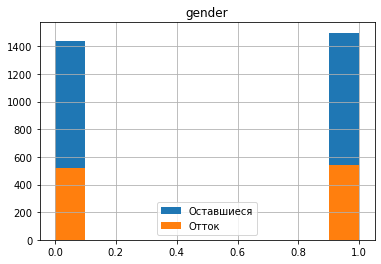

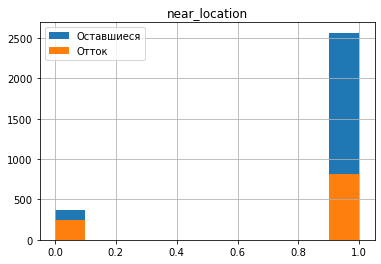

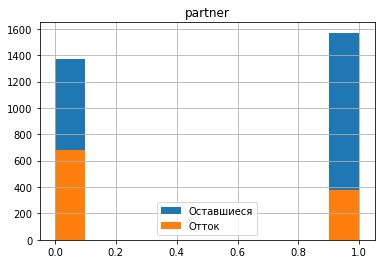

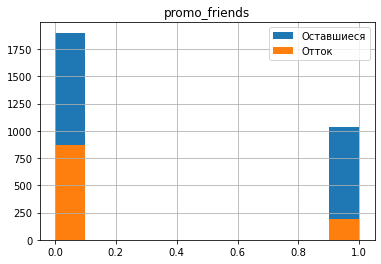

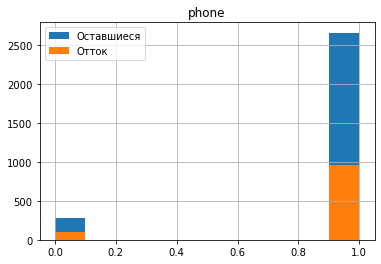

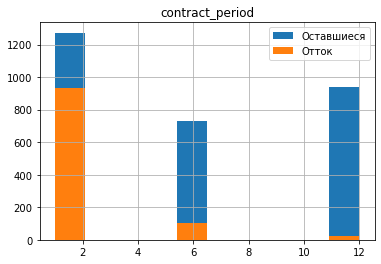

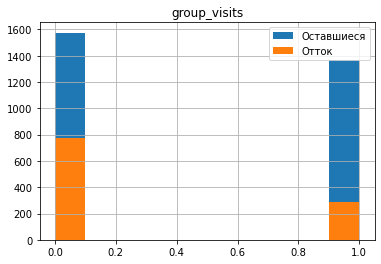

In [12]:
# Построим гистограмму для колонок которые содержат либо от 2 до 3 значений
df_barplot = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']
for column in df_barplot:
    df.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

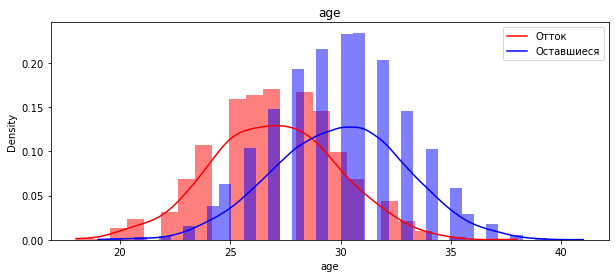

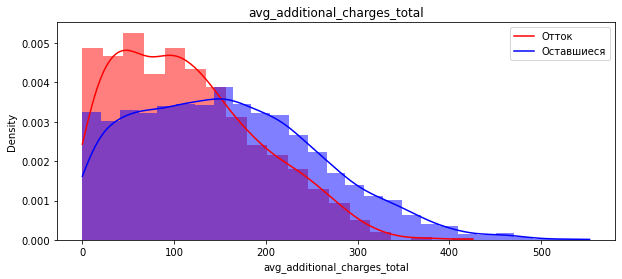

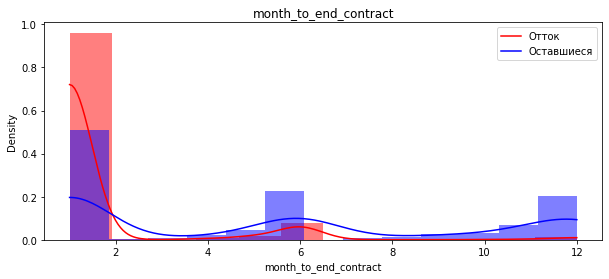

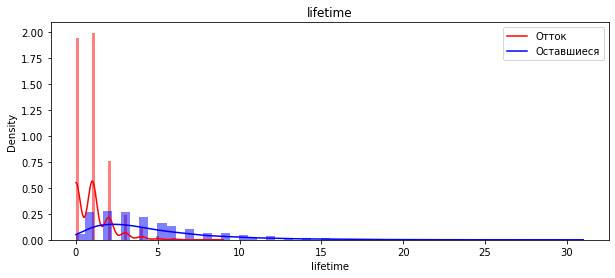

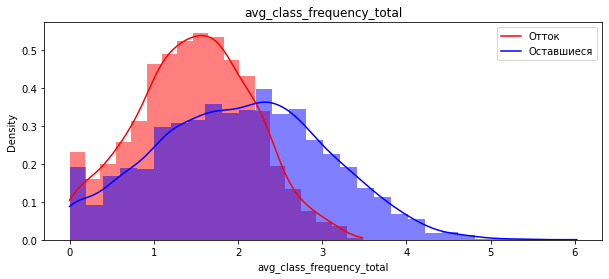

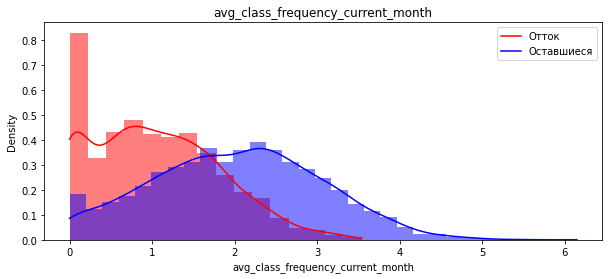

In [13]:
#Построим столбчатую диаграмму для остальных колонок, разделив пользователей на оставшихся и ушедших из фитнес-центра
for column in df.columns.drop('churn'):
    if column not in df_barplot:
        plt.figure(figsize=(10,4)) 
        plt.title(column)
        sns.histplot(people_left[column],color='red',kde=True,stat="density", linewidth=0)
        sns.histplot(people_stayed[column],color='blue',kde=True,stat="density", linewidth=0)
        plt.legend(['Отток', 'Оставшиеся'])
        plt.show()

Построенные стобчатые диаграммы подтверждают ранее сделанные выводы и помогают проще воспринять информацию.

### Построение матрицы корреляций признаков. 

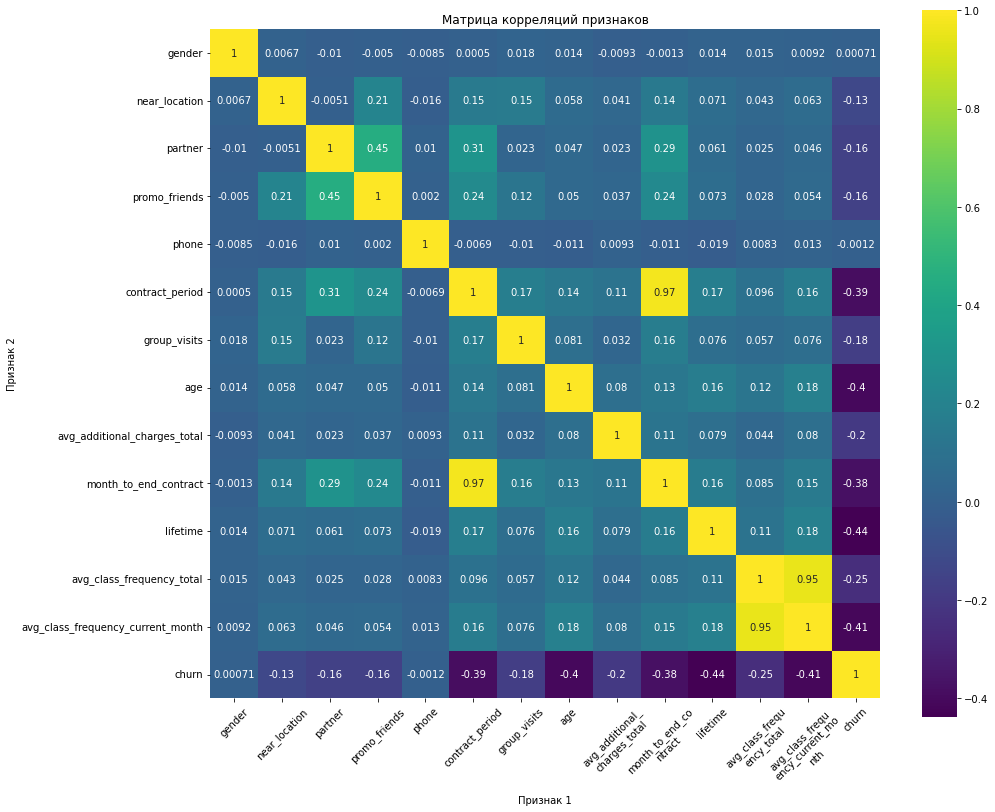

In [14]:
cm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(15, 13))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True,cmap='viridis')
max_width = 15
ax.set_xticklabels(tw.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
ax.tick_params(axis='x', rotation=45)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

По матрице корреляций видно, что наибольшее влияние на показатель оттока клиентов имеют следующие признаки :
   * время с момента первого обращения в фитнес-центр;
   * средняя частота посещений в неделю за предыдущий месяц;
   * возраст;
   * длительность текущего действующего абонемента.

In [15]:
# Посмотрим на распределение целевой переменной
df['churn'].value_counts(normalize=True)

0    0.73475
1    0.26525
Name: churn, dtype: float64

Как видно, в нашем датасете присутствует дисбаланс классов, т.к. класс 1 составляет только 25% от общего количества, в связи с этим качество машинного обучения может быть ниже.

##  Построение модели прогнозирования оттока клиентов.

In [16]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn',axis=1)
y = df['churn']

In [17]:
#разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
# задаем алгоритм для модели на основе алгоритма
lr_model = LogisticRegression(solver='liblinear',class_weight='balanced', random_state=0)

# обучим модель
lr_model.fit(X_train_st, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [20]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)

In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)

In [22]:
# выведем изученные метрики для логической регрессии
print('Метрики для логистической регрессии')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, lr_predictions)))

Метрики для логистической регрессии
Accuracy: 0.909
Precision: 0.764
Recall: 0.914


In [23]:
# выведем изученные метрики для случайного леса
print('Метрики для случайного леса')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test,rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test,rf_predictions)))

Метрики для случайного леса
Accuracy: 0.914
Precision: 0.845
Recall: 0.798


Выводы после построения моделей прогнозирования оттока клиентов:
- Для решения задачи бинарной классификации на прогнозирование оттока клиентов были сравнены по метрикам accuracy, precision и recall две модели - LogisticRegression (логистическая регрессия) и RandomForestClassifier (случайный лес);
- С учетом указания параметра class_weight='balanced', уменьшающего эффект от дисбаланса классов, модели показали схожие результаты и однозначно выделить среди них лучшую не предоставляется возможным:
  * по метрике Accuracy практически равные значения 0.909 и 0.912,
  * по метрике Precision лучше показатель у метода случайного леса - 0.852 против 0.764 у логической регрессии,
  * по метрике Recall лучше себя показывает логическая регрессия - 0.914 против 0.783. 

## Кластеризация клиентов.

In [24]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

In [25]:
linked = linkage(X_sc, method = 'ward') 

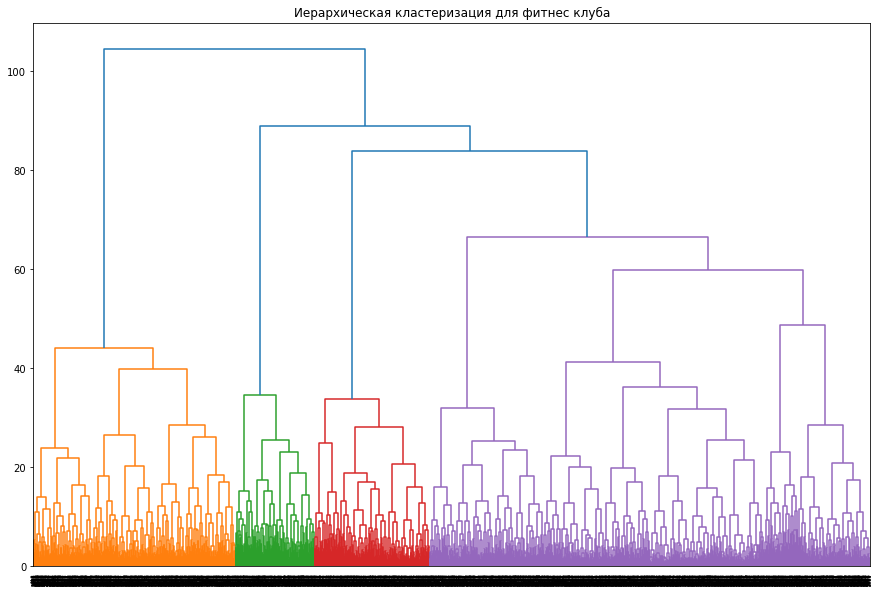

In [26]:
#визуализируем как дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для фитнес клуба')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цветов на графике. В дальнейшем, для обучения модели кластеризации на основании алгоритма K-Means мы будем использовать 5 кластеров.

In [27]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster_km'] = labels

Посмотрим на таблицу со средними значениями признаков по каждому кластеру

In [28]:
df.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Основные различия и отличительные детали кластеров:  
    * **Кластер 0** - 95% клиентов работают или живут недалеко от фитнес центра, более 78% являются сотрудниками компаний-партнеров фитнес клуба, более 57% купили абонемент по акции "приведи друга" и более 54% ходят на групповые занятия. У этого кластера самый большой показатель количества месяцов абонемента до окончания, в среднем почти 10 месяцев. Самый низкий уровень оттока среди всех кластеров - менее 3%.  
    * **Кластер 1** - более 86% клиентов работают или живут недалоке от фитнес клуба, но при этом 47% являются сотрудниками компаний-партнеров фитнес клуба. Отличительной особенностью этого кластера является то, что никто из клиентов не указал свой номер телефона. Средний уровень оттока - 26%.  
    * **Кластер 2** - Никто из клиентов не живет/не работает рядом с фитнес центром, среднее количество месяцев до окончания 2 месяца. У этого кластера высокий показатель уровня оттока - 44%.  
    * **Кластер 3** - Все пользователи живут или работают недалеко от клуба, у этого кластера низкий процент людей которые пришли по акции "приведи клуба" и те кто является сотрудником компаний-партнеров фитнес клуба. Главная отличительная особенность кластера - средний срок абонемента 2 месяца, средний срок до окончания абонеменая 1 месяц. Худший показатель оттока пользователей среди всех кластеров - 51%.  
    * **Кластер 4** характеризуется не высокой длительностью текущего абонемента, всего 2,6 месяцев, однако люди в этом кластере дольше остальных ходят в фитнес клуб, почти 5 месяцев и чаще остальных, всреднем 3 раза в неделю. Почти все клиенты живут или работают недалеко от фитнес клуба и имеются в среднем 3 месяца до окончания абонемента. Данный кластер на втором месте по показателю оттока клиентов - 6,8%.

Далее построим распределение признаков для каждого из кластеров

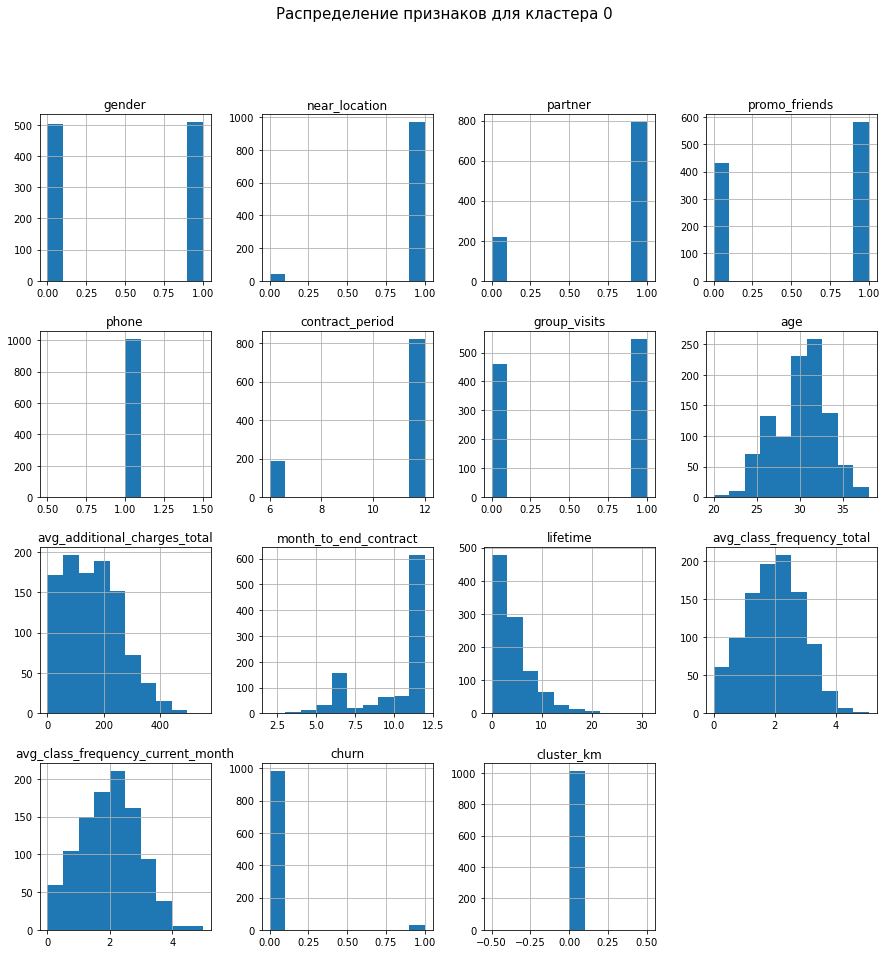

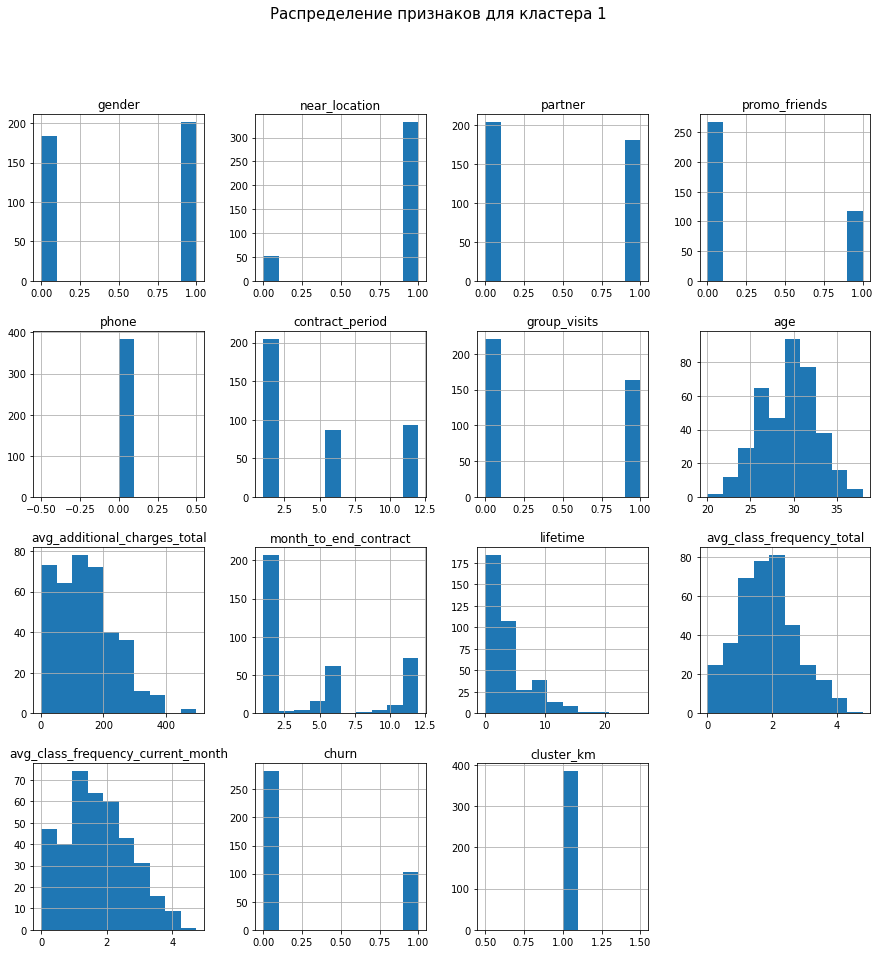

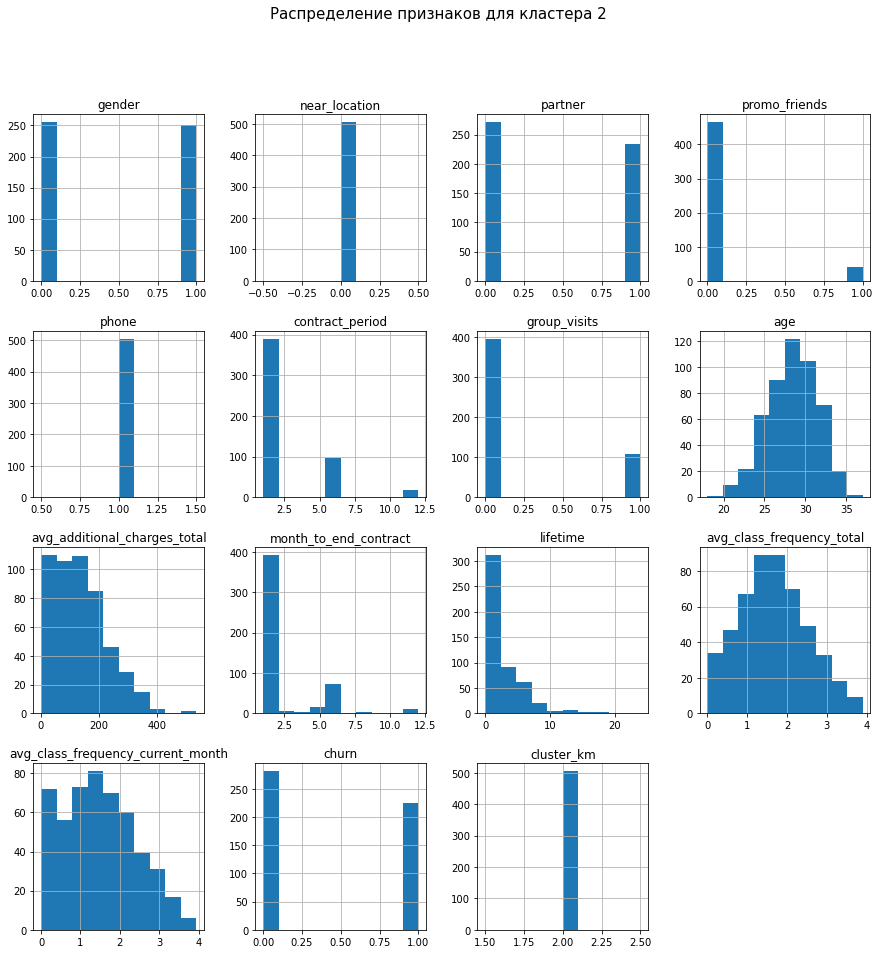

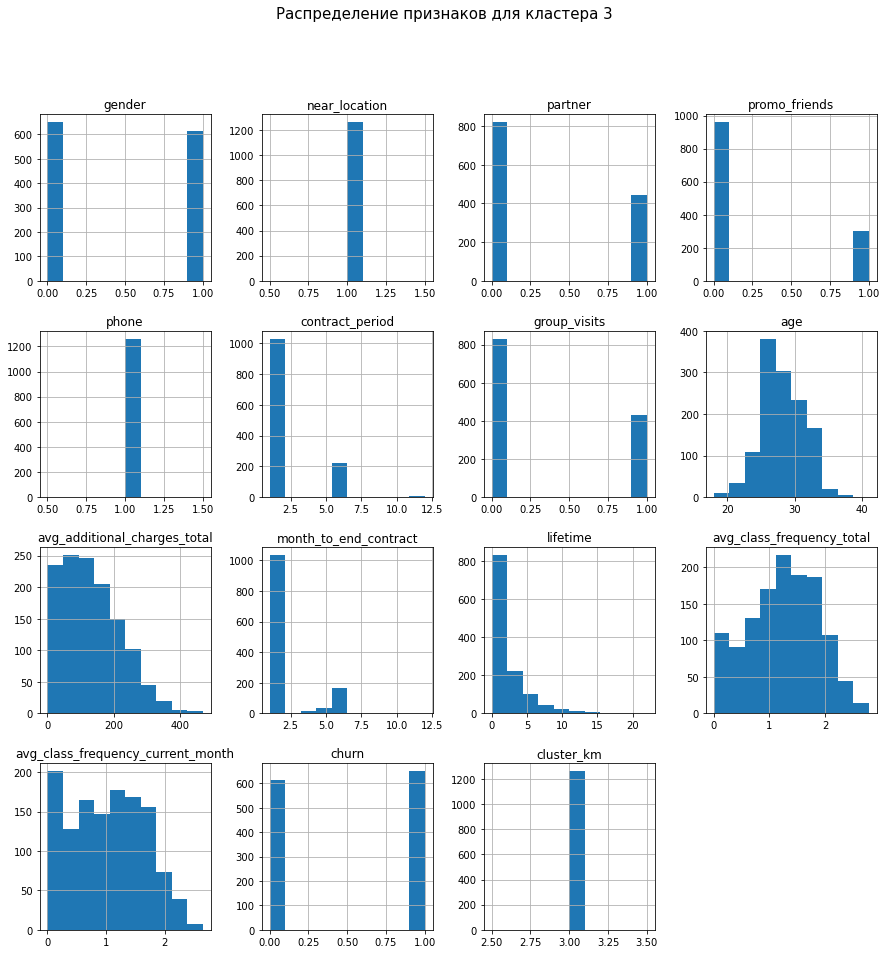

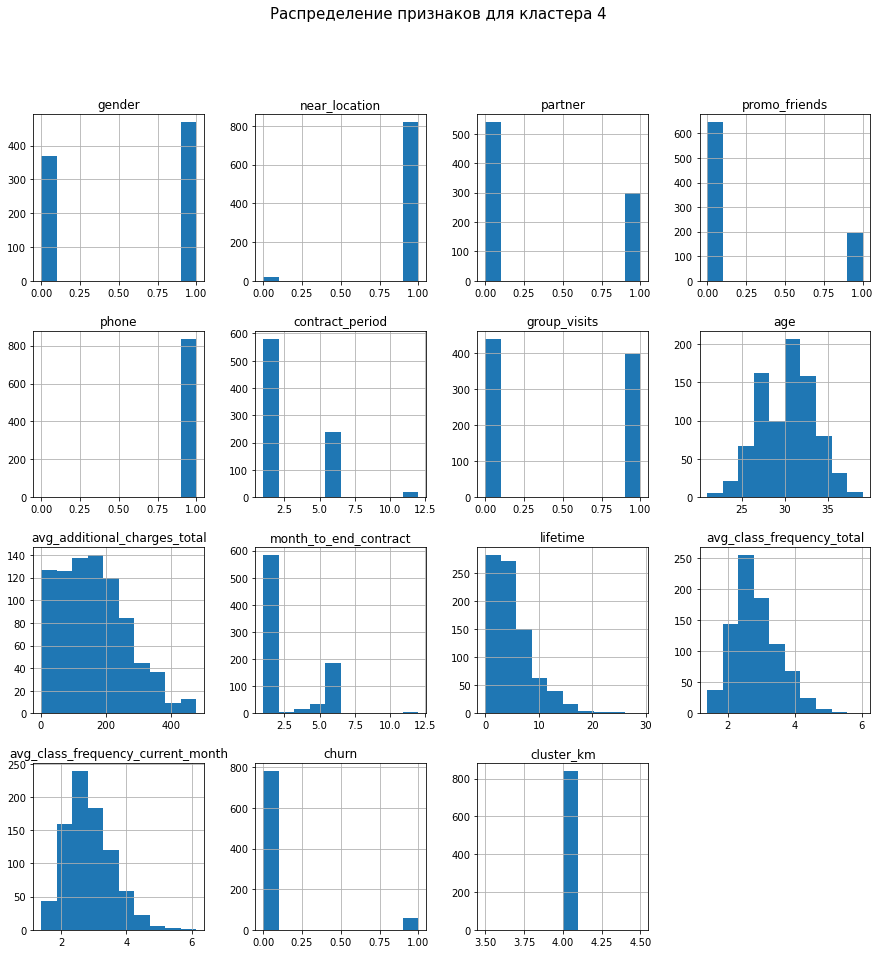

In [29]:
for i in [0, 1, 2, 3, 4]:
    df[df['cluster_km']==i].hist(figsize=(15,15))
    plt.suptitle(f'Распределение признаков для кластера {i}', fontsize = 15)
    plt.show()

В целом, графики наглядно подтверждают ранее сделанные выводы: самые успешные кластеры представлены людьми, которые чаще остальных ходят в фитнес клуб, имеют больший срок до окончания абонементов, либо уже пользуются услугами клуба дольше остальных, а также проживают или работают недалеко от клуба. Больше всего оттока пользователей в кластерах, где люди реже остальных посещают клуб и с наименьшем количеством месяцев до окончания срока действия договора.

In [30]:
#Построим таблицу с долей оттока для каждого кластера
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.027723
1,0.267532
2,0.443564
3,0.514263
4,0.068019


Как мы выяснили ранее, лучшие кластеры по оттоку клиентов это номер 1 и 4 (отток 2,8% и 6,8% соответственно).   
Хуже всего дела обстоят у кластера номер 3, отток более 50% пользователей.

## **Выводы**

I. На первом этапе была проведена предобработка и исследовательский анализ данных:   

   - Датасет был проверен на наличие дубликатов, название колонок были приведены к нижнему регистру;  
   
   
   - Были исследованы основные значения во всех колонках и сделаны следующие промежуточные выводы:  
   
       * Распределение по полу показывает, что количество мужчин и женщин практически одинаковое;
       * Более 80% человек проживают или работают поблизости от фитнес центра;
       * Почти половина всех посетителей являются сотрудниками компаний-партнёров клуба;
       * 30% людей стали клиентами в рамках акции "приведи друга";
       * Больше 90% посетителей указали свой номер телефона в анкетных данных;
       * Средняя длительность действующего абонемента у клиентов составляет 4.6 месяцев;
       * 40% от всех клиентов посещают групповые занятия;
       * Средний возраст посетителей фитнес клуба 29 лет;
       * Средняя выручка от других услуг фитнес-центра составляет 147 у.е.;
       * Средний срок до окончания абонемента у пользователей 4 месяца;
       * Среднее время с момента первого посещений около 4 месяцев;
       * Как правило клиенты посещают фитнес клуб 2 раза в неделю;
       * Показатель количества посещений в неделю за прошедший месяц немного ниже чем аналогичный показатель за год;
       * Доля пользователей переставших пользоваться услугами фитнес клуба 27%.  
       
        
   - Далее был проведен анализ значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался:
       * Распределение по полу не поменялось - количество мужчин и женщин практически одинаковое;
       * Люди, проживающие или работающие поблизости, реже попадают в отток;
       * Посетители, которые являются сотрудниками компаний-партнёров клуба реже перестают ходить в клуб чем остальные;
       * Посетители, пришедшие в клуб по акции "приведи друга", почти в два раза реже попадают в отток;
       * Указывал ли человек телефон или нет - это никак не влияет на его вероятность ухода из фитнес клуба;
       * Чаще попадают в отток люди, у которых срок действия абонемента составляет меньше 2 месяцев;
       * Клиенты, которые посещают групповые занятия реже попадают в отток;
       * Чаще покидают клуб люди помоложе;
       * Те, кто тратил меньше на другие услуги фитнес клуба чаще попадают в отток;
       * Чем меньше срок до окончания абонемента, тем выше шанс что человек уйдет;
       * Чаще в отток попадают люди, у которых с момента первого посещения прошел месяц, возможно, это категория людей, которые приобретали абонемент длительностью на 1 месяц;
       * Клиенты, которые реже ходят в фитнес клуб чаще попадают в отток.   
       
       
   - Была построена матрица корреляций признаков. Наибольшее влияние на показатель оттока клиентов имеют следующие признаки : 
       * Время с момента первого обращения в фитнес-центр;
       * Средняя частота посещений в неделю за предыдущий месяц;
       * Возраст;
       * Длительность текущего действующего абонемента.   
       
II. На втором этапе были построены модели прогнозирования оттока клиентов:  

   - Для решения задачи бинарной классификации на прогнозирование оттока клиентов были сравнены по метрикам accuracy, precision и recall две модели - LogisticRegression (логистическая регрессия) и RandomForestClassifier (случайный лес);
   - С учетом указания параметра class_weight='balanced', уменьшающего эффект от дисбаланса классов, модели показали схожие результаты и однозначно выделить среди них лучшую не предоставляется возможным:
  * по метрике Accuracy практически равные значения 0.909 и 0.912,
  * по метрике Precision лучше показатель у метода случайного леса - 0.852 против 0.764 у логической регрессии,
  * по метрике Recall лучше себя показывает логическая регрессия - 0.914 против 0.783. 

III. Была проведена кластеризация клиентов, по итогам которой для обучения модели кластеризации на основании алгоритма K-Means были использованы 5 кластеров. Кластеры имеют следующие отличительные особенности:  

   - **Кластер 0** - 95% клиентов работают или живут недалеко от фитнес центра, более 78% являются сотрудниками компаний-партнеров фитнес-клуба, более 57% купили абонемент по акции "приведи друга" и более 54% ходят на групповые занятия. У этого кластера самый большой показатель количества месяцов абонемента до окончания, в среднем почти 10 месяцев. Самый низкий уровень оттока среди всех кластеров - менее 3%.  
   - **Кластер 1** - более 86% клиентов работают или живут недалеко от фитнес-клуба, но при этом 47% являются сотрудниками компаний-партнеров фитнес-клуба. Отличительной особенностью этого кластера является то, что никто из клиентов не указал свой номер телефона. Средний уровень оттока - 26%.  
   - **Кластер 2** - Никто из клиентов не живет/не работает рядом с фитнес-центром, среднее количество месяцев до окончания 2 месяца. У этого кластера высокий показатель уровня оттока - 44%.  
   - **Кластер 3** - Все пользователи живут или работают недалеко от клуба, у этого кластера низкий процент людей, которые пришли по акции "приведи клуба" и те, кто является сотрудником компаний-партнеров фитнес-клуба. Главная отличительная особенность кластера - средний срок абонемента 2 месяца, средний срок до окончания абонемента 1 месяц. Худший показатель оттока пользователей среди всех кластеров - 51%.  
   - **Кластер 4** характеризуется невысокой длительностью текущего абонемента, всего 2,6 месяцев, однако, люди в этом кластере дольше остальных ходят в фитнес-клуб, почти 5 месяцев и чаще остальных, в среднем 3 раза в неделю. Почти все клиенты живут или работают недалеко от фитнес-клуба и имеются в среднем 3 месяца до окончания абонемента. Данный кластер на втором месте по показателю оттока клиентов - 6,8%.

